# Test Dataset
test dataset is corresponding with the test case as in the reference

`pyvol` can provide fast and efficient local volatility surface corresponding to the market prices.

In [18]:
strikes = [355.0, 357.5, 360.0, 362.5, 365.0, 367.5, 370.0, 372.5, 375.0, 377.5, 380.0, 382.5, 385.0, 387.5, 390.0]
dt = 1/365.0
ttms = [6 * dt, 34 * dt, 62 * dt]
initial_price = 356.01
r = 0.0151
market_prices = [3.61, 2.20, 1.22, 0.62, 0.25, 0.11, 0.05, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
                7.52, 6.09, 4.85, 3.82, 2.95, 2.18, 1.60, 1.14, 0.79, 0.54, 0.39, 0.27, 0.21, 0.15, 0.12,
                10.00, 8.55, 7.04, 6.35, 5.29, 4.37, 3.32, 2.68, 2.30, 1.74, 1.47, 1.16, 0.91, 0.72, 0.55]

from pyvol import LocalVolatilitySurface, OptionType, Interpolator 
span = 3
interval = 100
surface= LocalVolatilitySurface(initial_price, ttms, strikes, market_prices, OptionType.CALL, dt, r, span, interval, Interpolator.Bilinear)
vol= surface.LocalVol()
numerical_value = surface.VanillaFD(vol)

In [19]:
numerical_value

array([3.43955878e+00, 2.18870114e+00, 1.25585033e+00, 7.16340649e-01,
       3.94492882e-01, 1.93471366e-01, 9.15364143e-02, 4.71071871e-02,
       2.09405940e-02, 8.30236365e-03, 4.09125354e-03, 1.72387906e-03,
       6.35139639e-04, 2.70377211e-04, 1.12588671e-04, 7.41467861e+00,
       6.03935742e+00, 4.81290571e+00, 3.79612246e+00, 2.95397280e+00,
       2.23677273e+00, 1.65754148e+00, 1.23023819e+00, 8.82743343e-01,
       6.09613604e-01, 4.29354924e-01, 2.92213024e-01, 1.89935621e-01,
       1.23992115e-01, 8.04471796e-02, 9.98484895e+00, 8.57093127e+00,
       7.27297888e+00, 6.13863617e+00, 5.14436721e+00, 4.25323169e+00,
       3.47883857e+00, 2.84368882e+00, 2.28815683e+00, 1.80916771e+00,
       1.43829778e+00, 1.12626250e+00, 8.64367414e-01, 6.62084121e-01,
       5.05099453e-01])

## Data Visualization

### Numerical Values vs Market Data

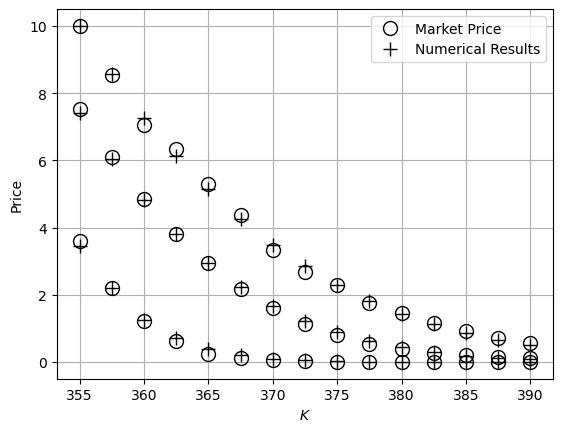

In [20]:
import matplotlib.pyplot as plt
import numpy as np
n_k = len(strikes)
n_t = len(ttms)
plot_strikes = np.zeros(n_t * n_k) 
for k in range(n_t):
    plot_strikes[n_k * k: n_k * (k + 1)] = strikes

plt.figure()
plt.plot(plot_strikes, market_prices, 'ko', linewidth=1, markersize=10, fillstyle = 'none')
plt.plot(plot_strikes, numerical_value, 'k+', linewidth=1, markersize=10)
plt.legend(['Market Price', 'Numerical Results'], loc='best')
plt.xlabel('$K$')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Local Volatility Interpolator

In [21]:
import pandas as pd
vol_data = surface.GetVolSurf()
prices = surface.GetPrices()
times = surface.GetTimes()
df = pd.DataFrame(vol_data.T, index = prices, columns = times)
df

,0.000000,0.002740,0.005479,0.008219,0.010959,0.013699,0.016438,0.019178,0.021918,0.024658,...,0.145205,0.147945,0.150685,0.153425,0.156164,0.158904,0.161644,0.164384,0.167123,0.169863
0.0000,0.100000,0.095005,0.090010,0.085015,0.080020,0.075025,0.070030,0.065035,0.060040,0.055045,...,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100
3.5601,0.117998,0.113103,0.108208,0.103313,0.098418,0.093522,0.088627,0.083732,0.078837,0.073942,...,0.018830,0.018791,0.018753,0.018715,0.018676,0.018638,0.018600,0.018561,0.018523,0.018485
7.1202,0.135996,0.131201,0.126406,0.121610,0.116815,0.112020,0.107225,0.102430,0.097634,0.092839,...,0.037560,0.037483,0.037406,0.037330,0.037253,0.037176,0.037099,0.037023,0.036946,0.036869
10.6803,0.153994,0.149299,0.144603,0.139908,0.135213,0.130518,0.125822,0.121127,0.116432,0.111736,...,0.056290,0.056174,0.056059,0.055944,0.055829,0.055714,0.055599,0.055484,0.055369,0.055254
14.2404,0.171992,0.167397,0.162801,0.158206,0.153610,0.149015,0.144420,0.139824,0.135229,0.130633,...,0.075019,0.074866,0.074713,0.074559,0.074406,0.074252,0.074099,0.073945,0.073792,0.073638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053.7896,0.973239,0.969317,0.965396,0.961475,0.957554,0.953633,0.949712,0.945790,0.941869,0.937948,...,0.270749,0.251838,0.232927,0.214016,0.195105,0.176194,0.157283,0.138372,0.119461,0.100550
1057.3497,0.979904,0.975956,0.972008,0.968060,0.964112,0.960164,0.956216,0.952268,0.948320,0.944372,...,0.271955,0.252894,0.233834,0.214774,0.195714,0.176653,0.157593,0.138533,0.119472,0.100412
1060.9098,0.986569,0.982594,0.978620,0.974645,0.970670,0.966695,0.962720,0.958745,0.954770,0.950795,...,0.273160,0.253950,0.234741,0.215531,0.196322,0.177113,0.157903,0.138694,0.119484,0.100275
1064.4699,0.993235,0.989233,0.985231,0.981229,0.977228,0.973226,0.969224,0.965222,0.961221,0.957219,...,0.274365,0.255006,0.235648,0.216289,0.196931,0.177572,0.158213,0.138855,0.119496,0.100137


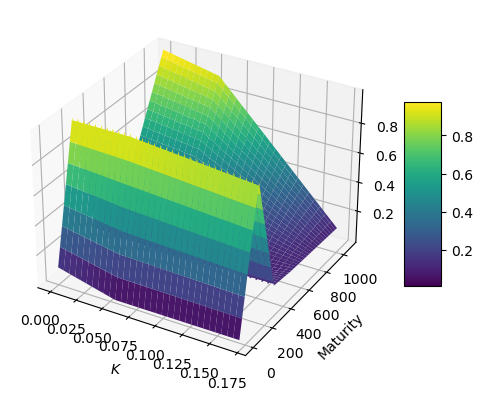

In [22]:
x, y = np.meshgrid(times, prices)
fig = plt.figure()
ax  = fig.add_subplot(111, projection = '3d')
surf = ax.plot_surface(x, y, df.values, cmap = 'viridis')
ax.set_xlabel("$K$")
ax.set_ylabel('Maturity')
ax.set_zlabel('$\sigma$')
fig.colorbar(surf, shrink=0.5, aspect=5, ax = ax)
plt.show()